<a href="https://colab.research.google.com/github/yudhiesh1997/Housing-Prices-Advanced-Regression/blob/master/ODL_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices 

[Dataset URL](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


In [86]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [87]:
test = pd.read_csv("/content/drive/My Drive/house-prices-advanced-regression-techniques (1)/test.csv")
train = pd.read_csv("/content/drive/My Drive/house-prices-advanced-regression-techniques (1)/train.csv")

In [88]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Analysis

There are many features present in this dataset and some of them have significant missing values.

It is the same for the test.csv now I need to figure out how to impute these missing values. I could just use the median values but that only works for numerical columns. Some of these are categorical columns.

Before cleaning the data let us see the composition of these features i.e., are they numerical(discrete or continous), categorical etc. 


In [91]:
cat_feat = [num for num in train.columns if train[num].dtypes == "O"]
print(f'Number of categorical features is {len(cat_feat)}')

Number of categorical features is 43


In [92]:
numeric_feat = [num for num in train.columns if train[num].dtypes != "O"]
print(f'Number of numeric features is {len(numeric_feat)}')

Number of numeric features is 38


In [93]:
# Temporal Variables (DateTime variables)
temp_variables = [feat for feat in numeric_feat if "Yr" in feat or "Year" in feat]
print(f'Temporal variables : \n{temp_variables}')

Temporal variables : 
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


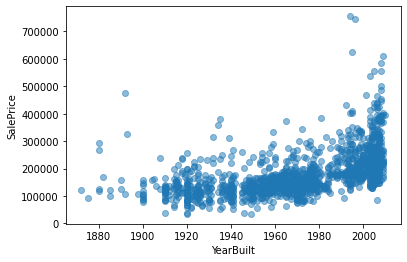

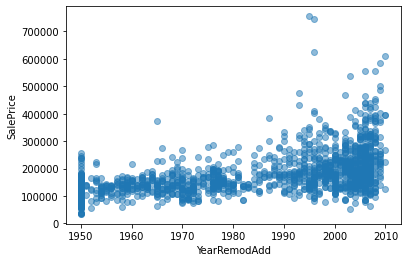

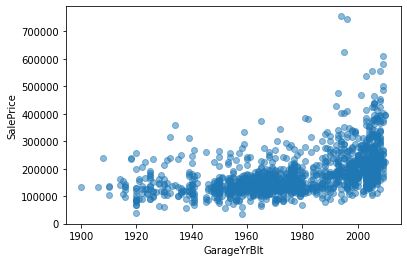

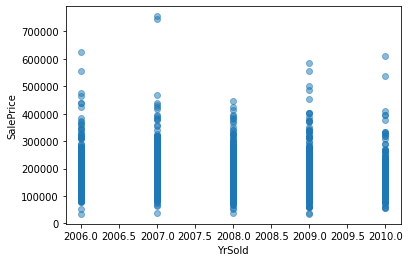

In [94]:
for feat in temp_variables:
  data = train.copy()
  # Shows the age of the house when it was sold 
  plt.scatter(data[feat], data["SalePrice"], alpha=0.5)
  plt.xlabel(feat)
  plt.ylabel("SalePrice")
  plt.show()

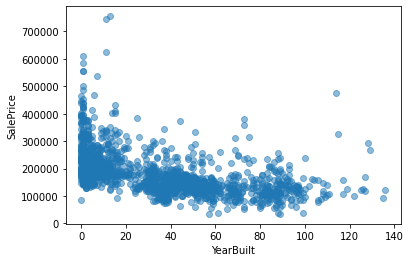

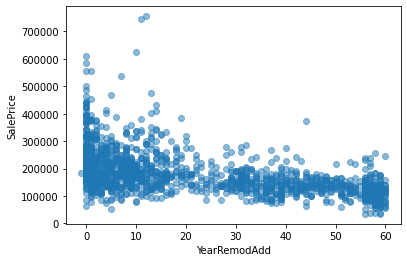

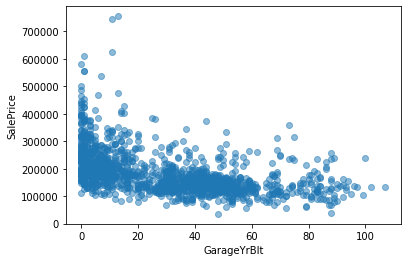

In [95]:
for feat in temp_variables:
  if feat != "YrSold":
    data = train.copy()
    # Shows the age of the house when it was sold 
    data[feat] = data["YrSold"] - data[feat]
    plt.scatter(data[feat], data["SalePrice"], alpha = 0.5)
    plt.xlabel(feat)
    plt.ylabel("SalePrice")
    plt.show()

### Findings from the plotting of the temporal variables against the target variables:

Based on year and independant variable:
1. The houses sold aroud 2007 were much higher compared to any other year.
2. The houses built in the around 1890 and 2000+ sold for the most amount 
3. The houses where remodelling was done recently sold for the most as well as the houses with a garage built recently.

Based on age and independant variable:
1. Houses with a lower age, newer remodelling done and newer garage had higher sales prices.

### Numerical Variables 

Numerical variables are made up of Continous and Discrete values 

Continous variables have no range and can make up any number whereas discrete variables have some sort of range to them i.e., there are 12 possibillities when rolling a dice.

Here I am assuming a discrete variable to be a variable that has less than 25 unique values and a continous to be anything other than the discrete variables in the numeric features list.

I will plot the relationship between each of these features with the target feature.

In [96]:
discrete_variables = [feat for feat in numeric_feat if len(train[feat].unique()) < 25 and feat not in temp_variables + ["Id"]]
print(f'Discrete Variables :\n{discrete_variables}')

Discrete Variables :
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


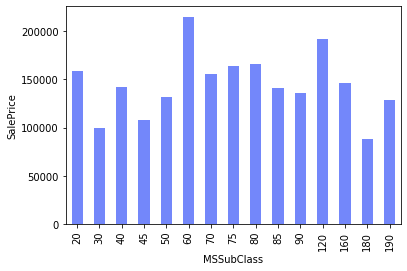

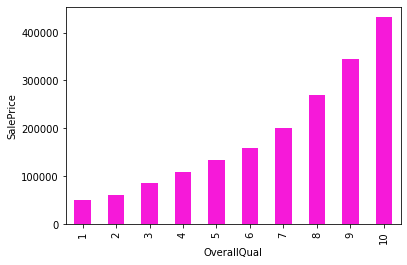

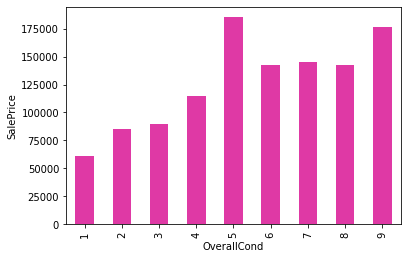

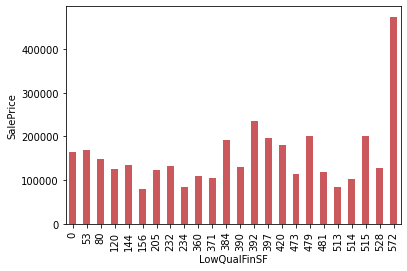

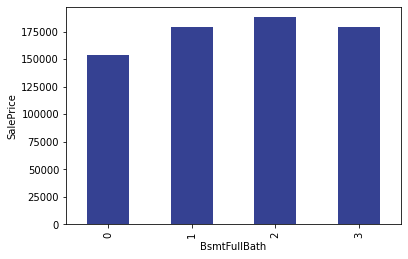

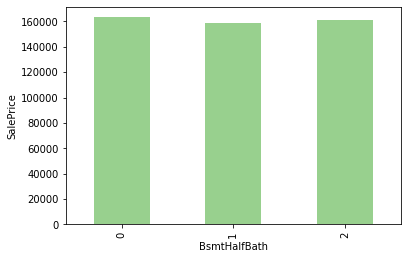

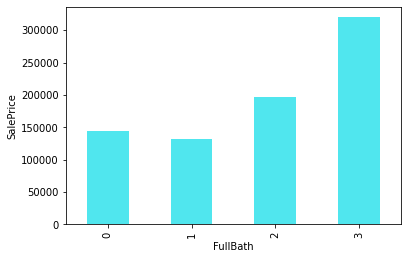

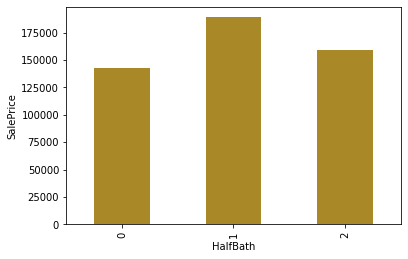

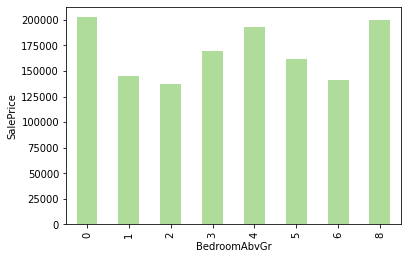

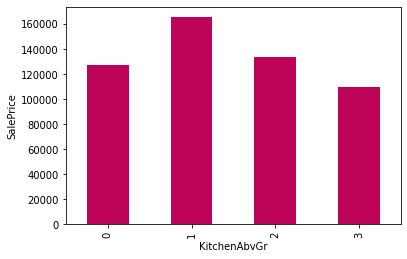

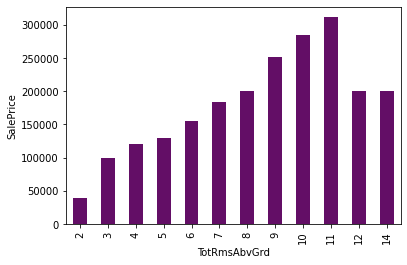

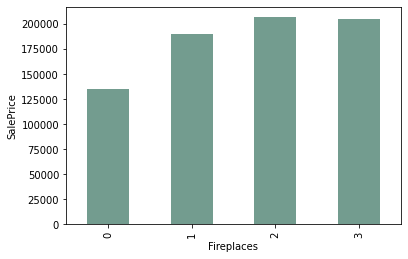

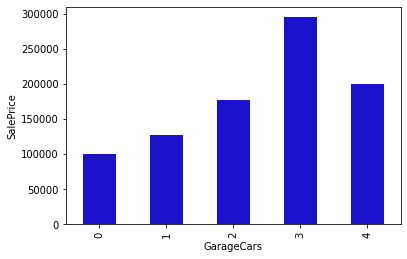

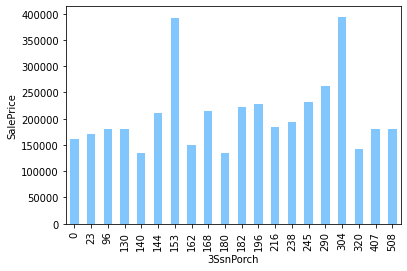

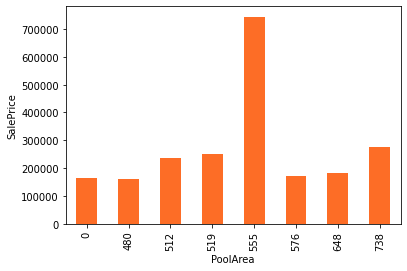

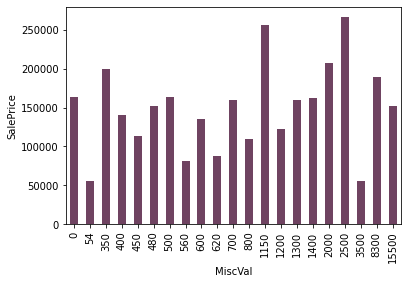

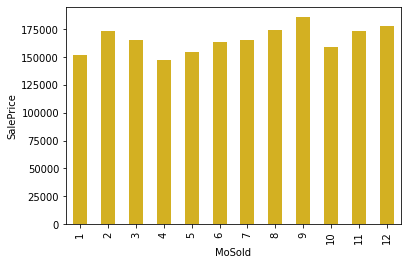

In [97]:
for feat in discrete_variables:
  data = train.copy()
  data.groupby(feat)["SalePrice"].median().plot.bar(color = np.random.rand(3,))
  plt.xlabel(feat)
  plt.ylabel("SalePrice")
  plt.show()

## Discrete variables findings

1. Overall Quality and Sale Price increase exponentially 
2. The number of FullBath increases with the Sale Price
3. Fireplaces and Sale Price are increase together

In [98]:
continous_variables = [feat for feat in numeric_feat if feat not in discrete_variables + temp_variables + ["Id"]]
print(f'Continous variables :\n{continous_variables}')

Continous variables :
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


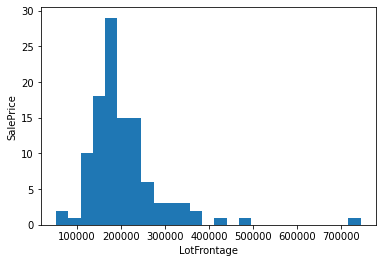

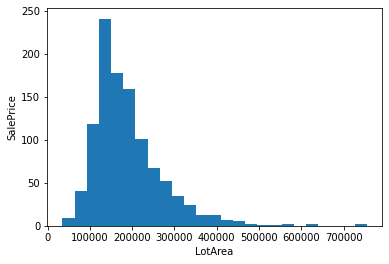

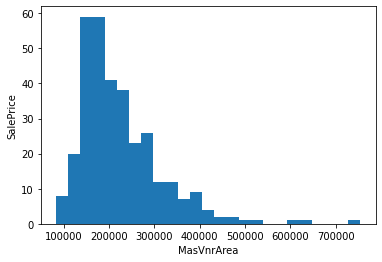

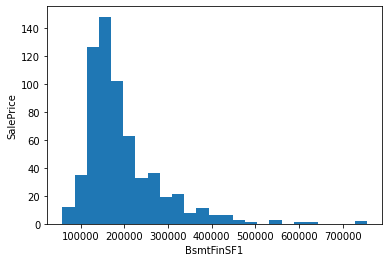

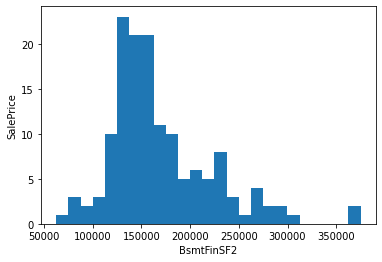

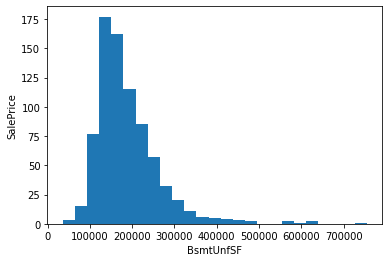

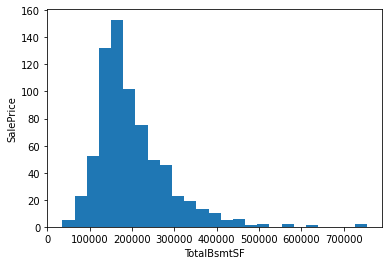

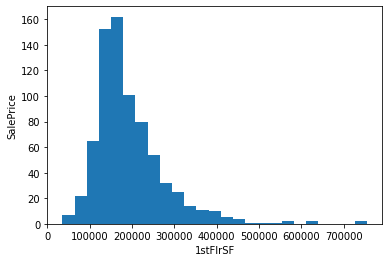

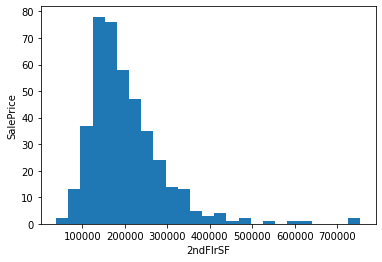

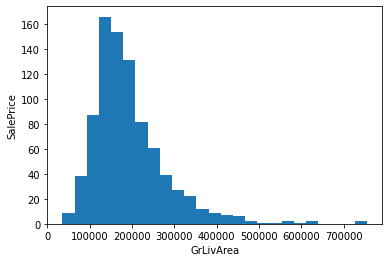

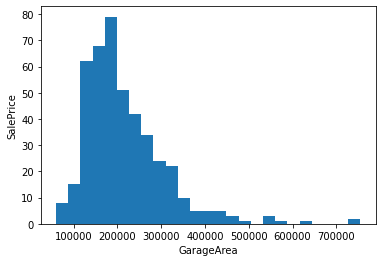

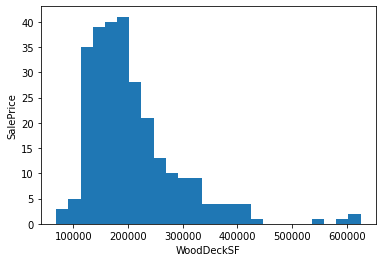

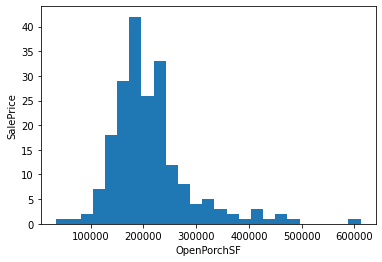

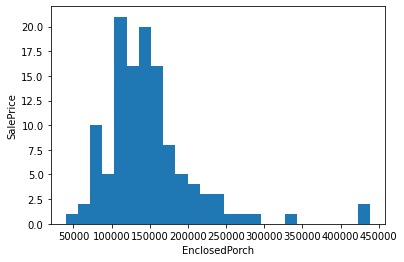

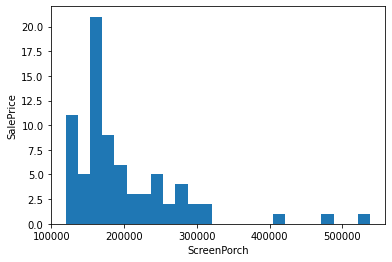

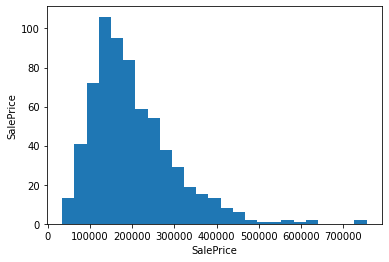

In [99]:
for feat in continous_variables:
  data = train.copy()
  data.groupby(feat)["SalePrice"].median().plot.hist(bins=25)
  plt.xlabel(feat)
  plt.ylabel("SalePrice")
  plt.show()

## Continous variables findings

The data is skewed to the left therefore it needs to be normalized!
We need to convert the non-Gaussian distribution into a Gaussian distribution.

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_copy = train.copy()

x = data_copy[continous_variables].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=continous_variables, index = data_copy.index)
data_copy[continous_variables] = df_temp

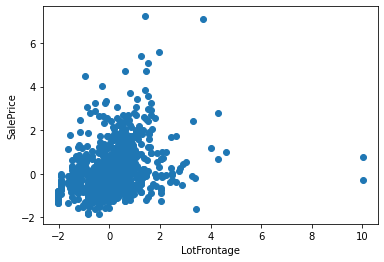

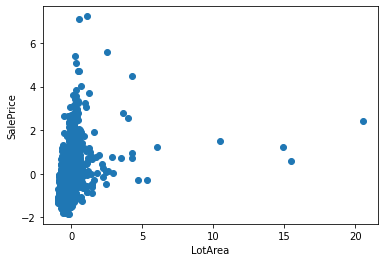

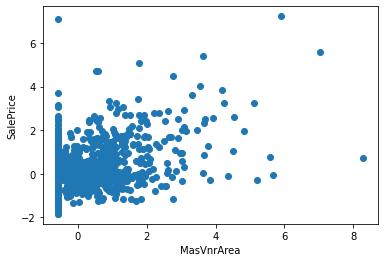

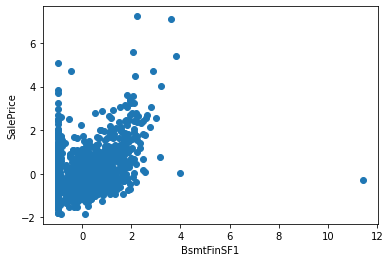

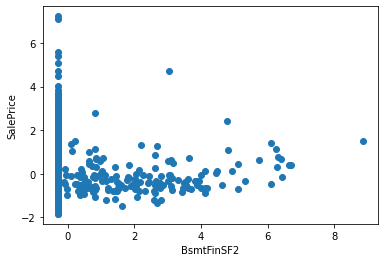

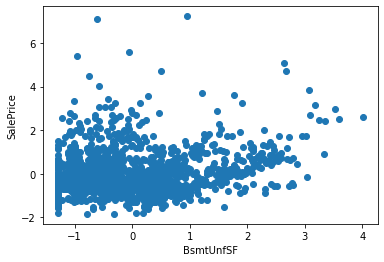

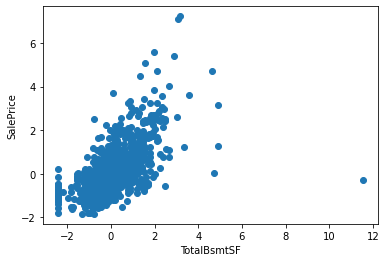

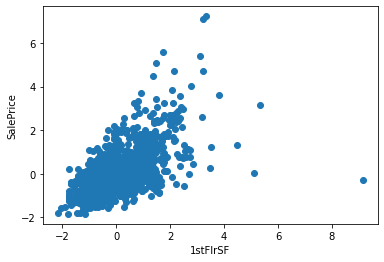

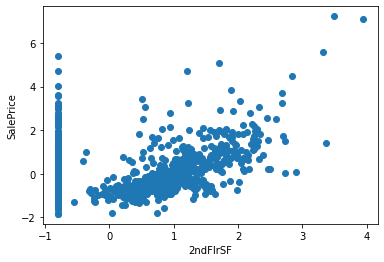

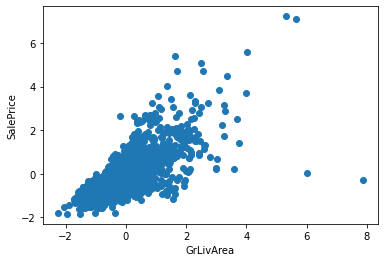

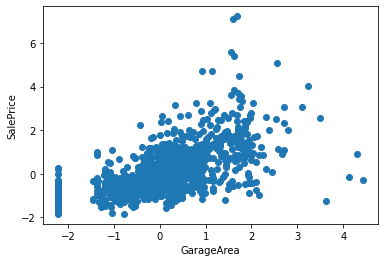

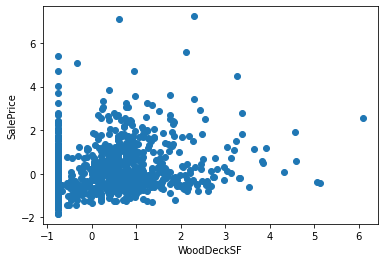

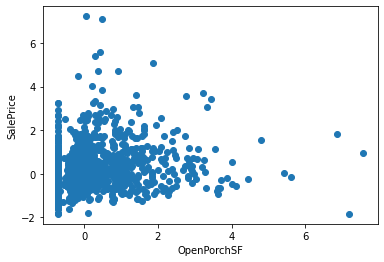

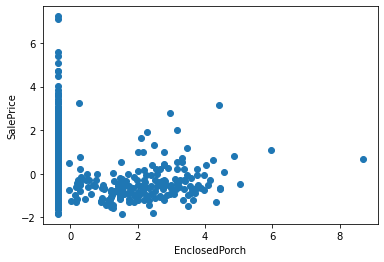

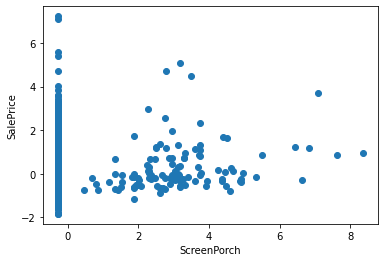

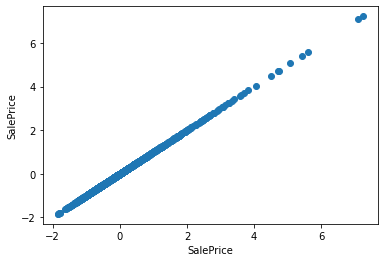

In [101]:
for feat in continous_variables:
  plt.scatter(data_copy[feat], data_copy["SalePrice"])
  plt.xlabel(feat)
  plt.ylabel("SalePrice")
  plt.show()

## Data has been normalised but on the copy of the original csv. Later we will build a pipeline to do all of this on both train and test datasets once the analysis and feature selection is done. 

## Check for outliers in the data. This will help with seeing how we should replace the missing numerical values.

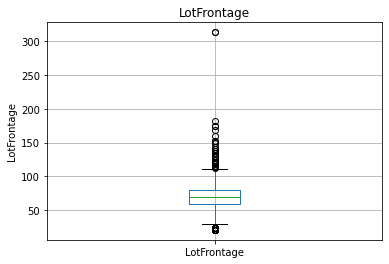

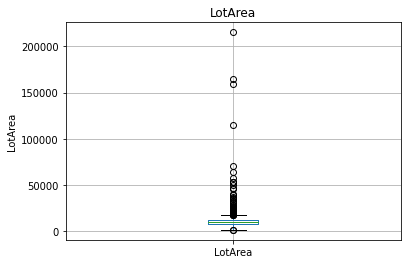

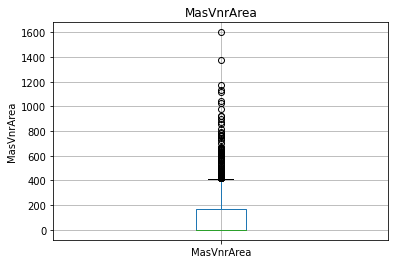

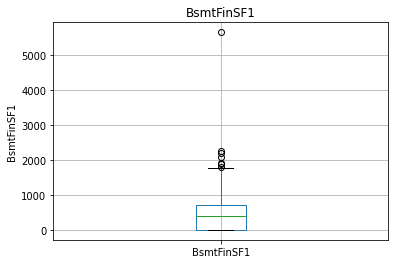

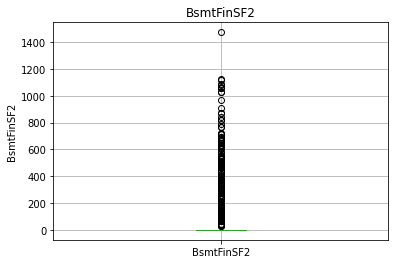

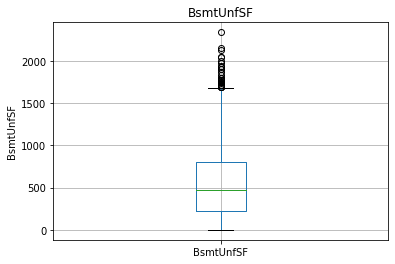

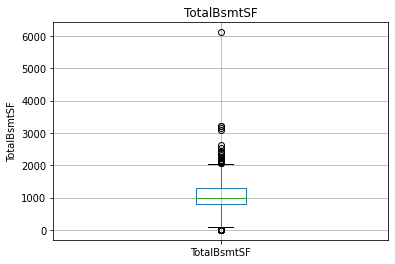

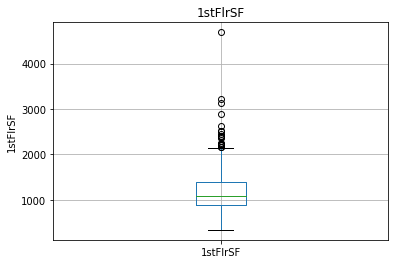

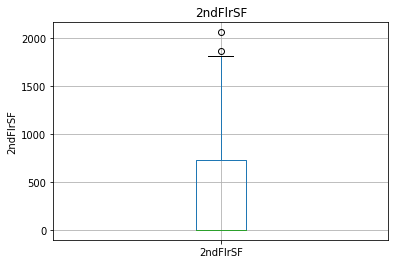

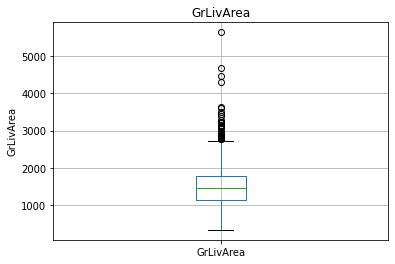

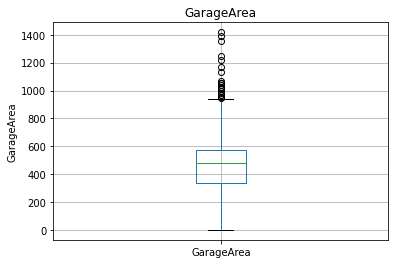

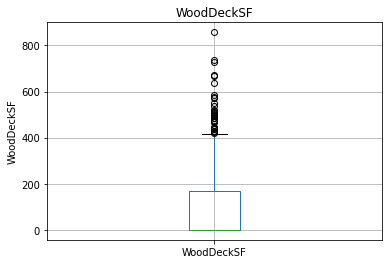

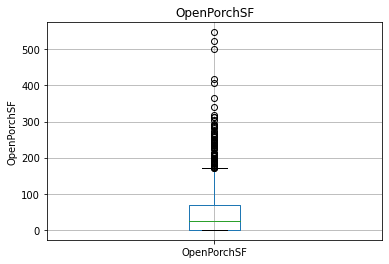

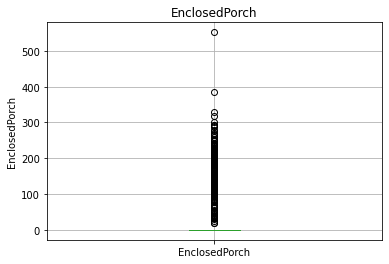

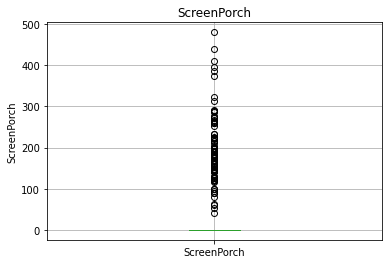

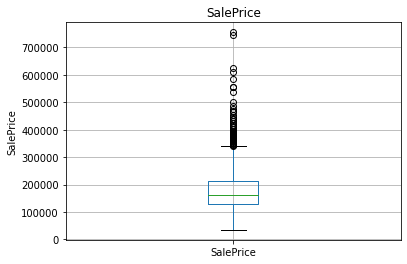

In [102]:
for feat in continous_variables:
  train.boxplot(column=feat)
  plt.ylabel(feat)
  plt.title(f"{feat}")
  plt.show()

### Split the data columns into Categorical and Numerical features


In [103]:
categorical_features = [cat for cat in train.columns if train[cat].dtypes == "O"]
for list in categorical_features:
  print(f"{list}")
  print(f'Unique values : {test[list].unique()}')
  print()

MSZoning
Unique values : ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]

Street
Unique values : ['Pave' 'Grvl']

Alley
Unique values : [nan 'Pave' 'Grvl']

LotShape
Unique values : ['Reg' 'IR1' 'IR2' 'IR3']

LandContour
Unique values : ['Lvl' 'HLS' 'Bnk' 'Low']

Utilities
Unique values : ['AllPub' nan]

LotConfig
Unique values : ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']

LandSlope
Unique values : ['Gtl' 'Mod' 'Sev']

Neighborhood
Unique values : ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']

Condition1
Unique values : ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']

Condition2
Unique values : ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']

BldgType
Unique values : ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']

HouseStyle
Unique values : ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' 

In [104]:
numerical_features = [cat for cat in train.columns if train[cat].dtypes != "O"]
print(numerical_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


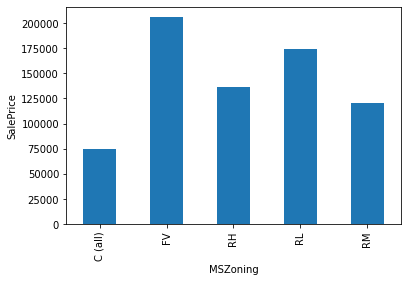

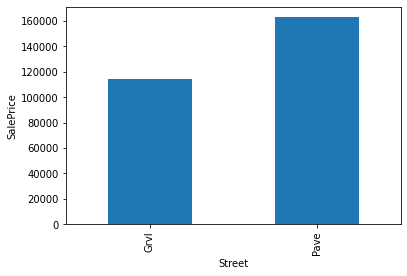

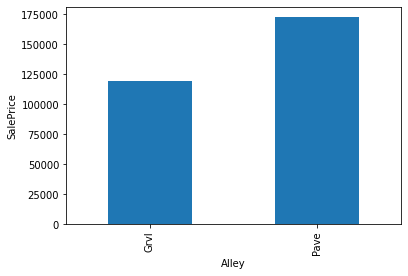

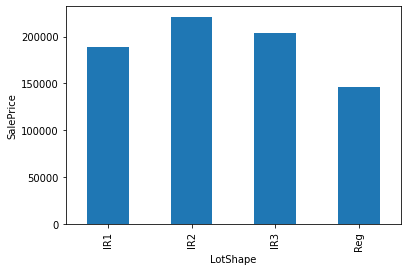

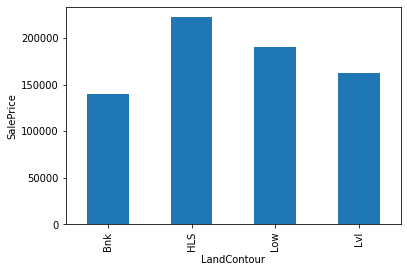

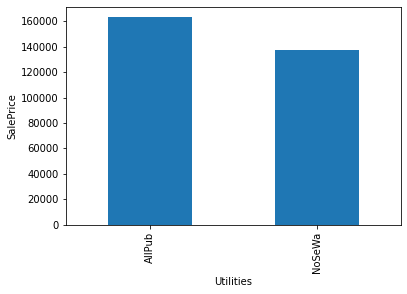

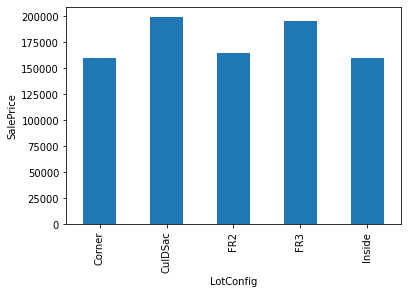

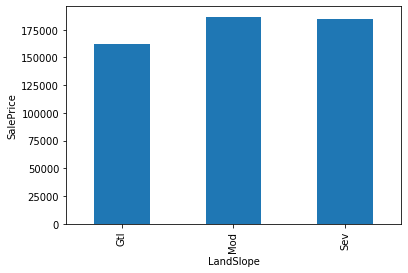

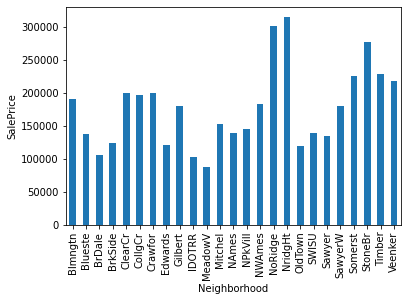

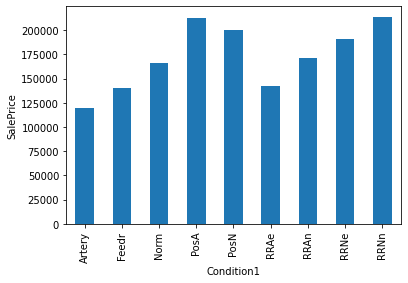

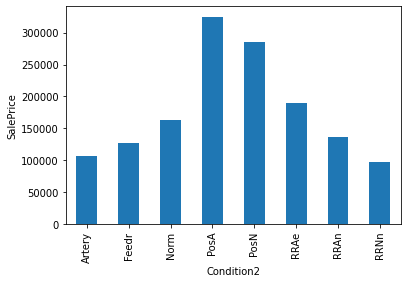

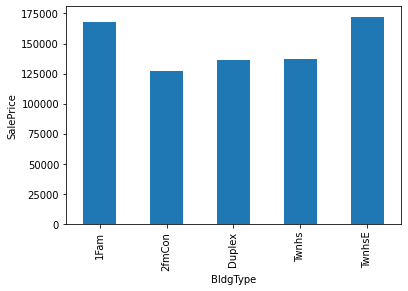

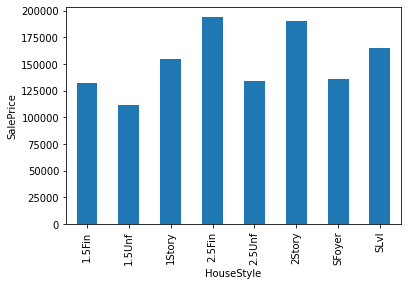

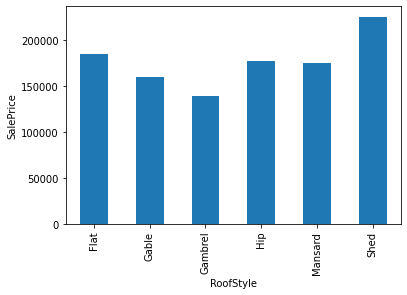

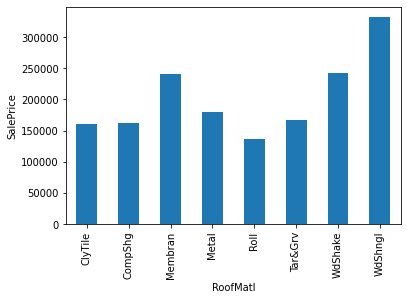

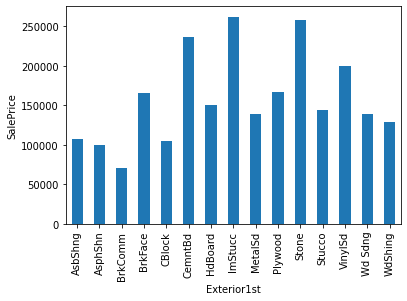

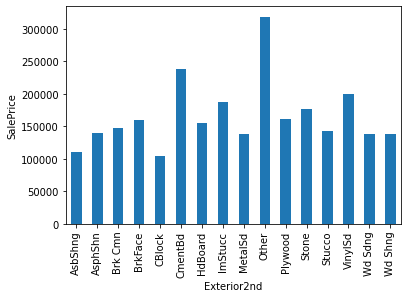

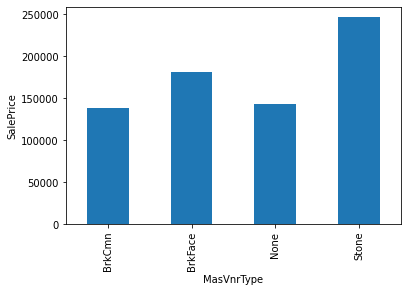

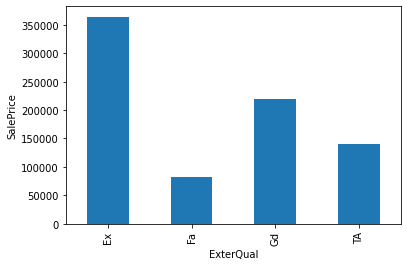

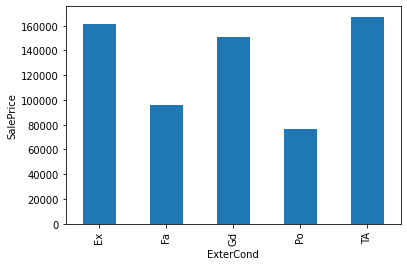

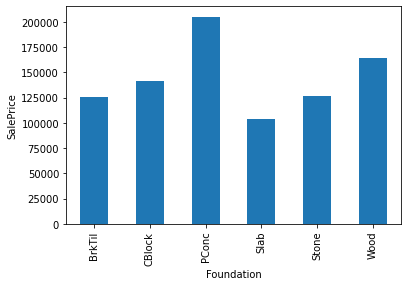

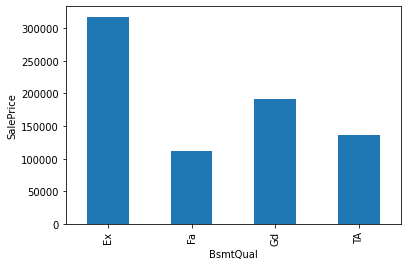

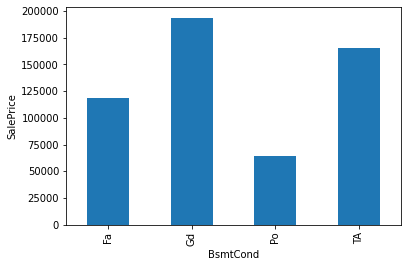

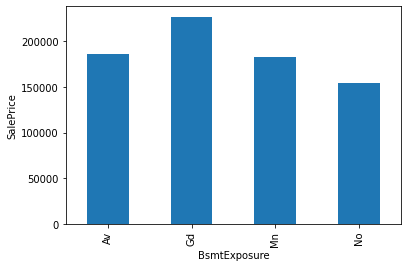

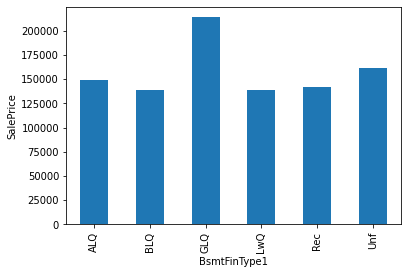

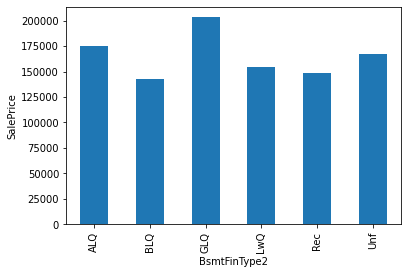

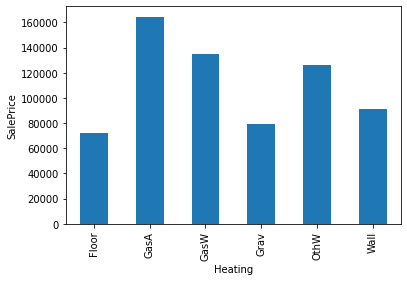

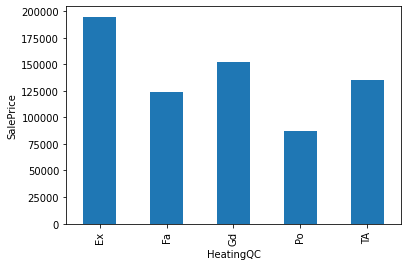

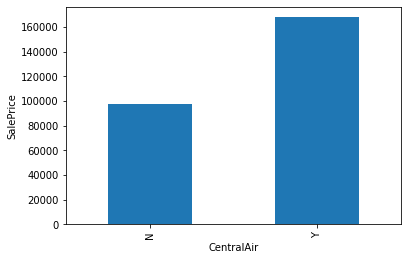

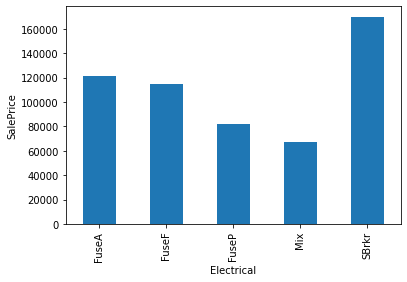

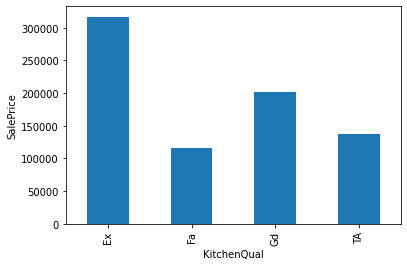

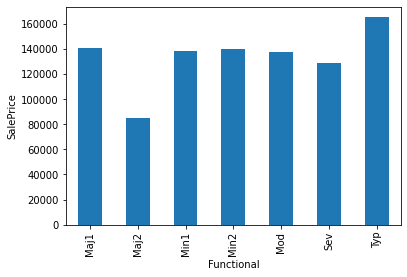

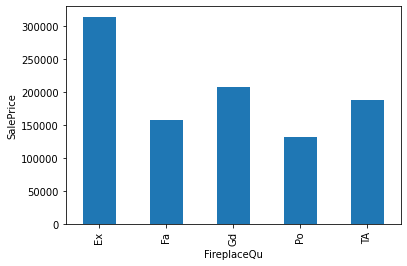

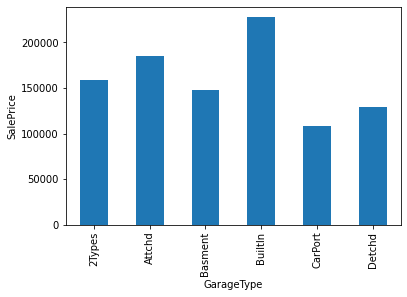

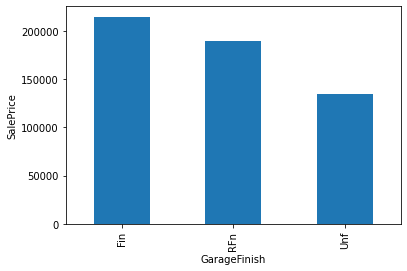

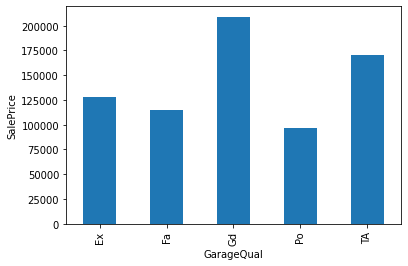

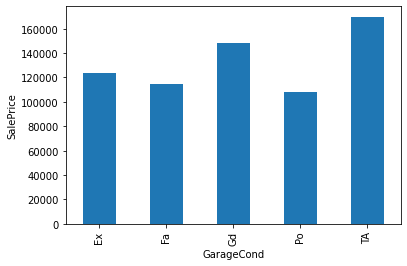

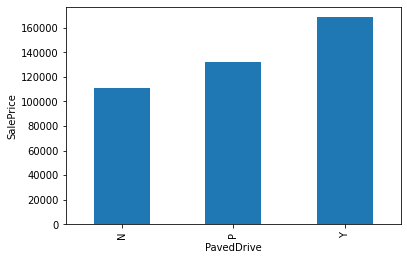

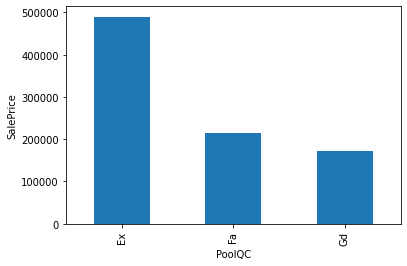

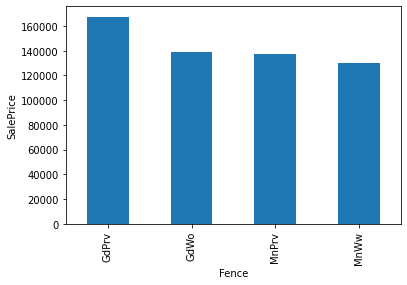

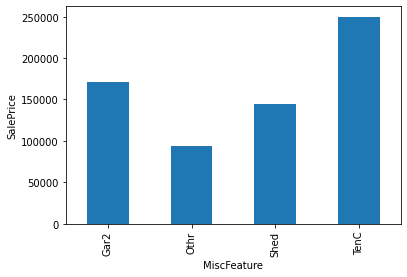

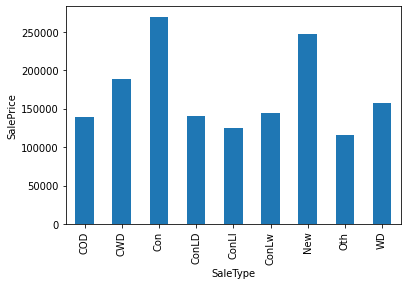

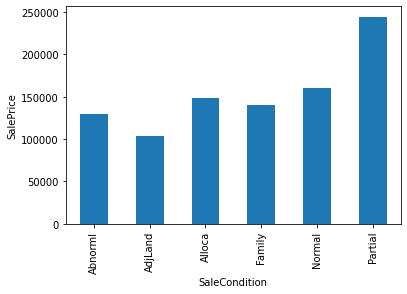

In [105]:
for feat in categorical_features:
  data = train.copy()
  data.groupby(feat)["SalePrice"].median().plot.bar()
  plt.xlabel(feat)
  plt.ylabel("SalePrice")
  plt.show()


## Here we can see the relationship between the individual categories in each categorical features with the target variable. 

# Feature Engineering 

1. How to deal with missing variables
2. How to encode Temporal Variables 
3. How to handle categorical variables 
4. Standardise the values in the dataset.

Here the missing values in the categorical, numerical and temporal variables are shown to give a better understanding of what we are dealing with. 

As well as the composition of each category i.e., the unique values present in each of them. 


In [106]:
categorical_features_nan = [cat for cat in train.columns if train[cat].isnull().sum()>1 and train[cat].dtypes == "O"]
for list in categorical_features_nan:
  print(f"{list}")
  print(f'Unique values : {test[list].unique()}')
  print()

Alley
Unique values : [nan 'Pave' 'Grvl']

MasVnrType
Unique values : ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]

BsmtQual
Unique values : ['TA' 'Gd' 'Ex' 'Fa' nan]

BsmtCond
Unique values : ['TA' 'Po' 'Fa' 'Gd' nan]

BsmtExposure
Unique values : ['No' 'Gd' 'Mn' 'Av' nan]

BsmtFinType1
Unique values : ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]

BsmtFinType2
Unique values : ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]

FireplaceQu
Unique values : [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']

GarageType
Unique values : ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']

GarageFinish
Unique values : ['Unf' 'Fin' 'RFn' nan]

GarageQual
Unique values : ['TA' nan 'Fa' 'Gd' 'Po']

GarageCond
Unique values : ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']

PoolQC
Unique values : [nan 'Ex' 'Gd']

Fence
Unique values : ['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']

MiscFeature
Unique values : [nan 'Gar2' 'Shed' 'Othr']



In [107]:
list_missing = ["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"]
print("Test:")
for list in list_missing:
  print(f"{list}")
  print(f'Unique values : {test[list].unique()}')
  print()
  

Test:
Alley
Unique values : [nan 'Pave' 'Grvl']

PoolQC
Unique values : [nan 'Ex' 'Gd']

Fence
Unique values : ['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']

MiscFeature
Unique values : [nan 'Gar2' 'Shed' 'Othr']

FireplaceQu
Unique values : [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']



## Missing values

In [108]:
print(f'Columns with missing values \n{train.columns[train.isnull().any()]}')

Columns with missing values 
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [109]:
list_missing = ["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"]
print("Train:")
for list in list_missing:
  
  print(f"{list}")
  print(f'Unique values : {train[list].unique()}')
  print()
  

Train:
Alley
Unique values : [nan 'Grvl' 'Pave']

PoolQC
Unique values : [nan 'Ex' 'Fa' 'Gd']

Fence
Unique values : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

MiscFeature
Unique values : [nan 'Shed' 'Gar2' 'Othr' 'TenC']

FireplaceQu
Unique values : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']



In [110]:
missing_values_train = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']

In [111]:
# Find the unique values in each missing column data

for list in missing_values_train:
  print(f"{list}")
  print(f'Unique values : {train[list].unique()}')
  print()

LotFrontage
Unique values : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

Alley
Unique values : [nan 'Grvl' 'Pave']

MasVnrType
Unique values : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]

MasVnrArea
Unique values : [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670

In [112]:
numerical_features = [cat for cat in train.columns if train[cat].isnull().sum() > 1 and train[cat].dtypes != "O"]
print(f'Numerical features with missing values : \n{numerical_features}')

Numerical features with missing values : 
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [113]:
missing_percentage_train = train.isnull().sum() * 100/len(train)

## Percentage of missing values in each column of the train and test data

In [114]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_percentage_train)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [115]:
missing_percentage_test = test.isnull().sum() * 100/len(test)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(missing_percentage_test)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
B

## Impute missing values

### Replace the missing data in the categorical features with a new label called "Missing"

### Replace the missing data in the numerical features with the median of their respective columns and create a new column which keeps track whether or not the feature had a missing value. 



In [116]:
def replace_cat(dataframe, dataframe_cat):
  data = dataframe.copy()
  data[dataframe_cat] = data[dataframe_cat].fillna("Missing")
  return data

In [117]:
train = replace_cat(train, categorical_features)

train[categorical_features].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [118]:
# Find the unique values in each missing column data

for list in categorical_features:
  print(f"{list}")
  print(f'Unique values : {train[list].unique()}')
  print()

MSZoning
Unique values : ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street
Unique values : ['Pave' 'Grvl']

Alley
Unique values : ['Missing' 'Grvl' 'Pave']

LotShape
Unique values : ['Reg' 'IR1' 'IR2' 'IR3']

LandContour
Unique values : ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities
Unique values : ['AllPub' 'NoSeWa']

LotConfig
Unique values : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope
Unique values : ['Gtl' 'Mod' 'Sev']

Neighborhood
Unique values : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1
Unique values : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2
Unique values : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType
Unique values : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle
Unique values : ['2Story' '1Story' '1.5Fi

### All the missing categories are replaced with "Missing"

In [119]:
## Replace the missing numerical features with the median value of their respective column as there were a lot of outliers in the boxplots 

for num in numerical_features:
  median_ = train[num].median()
  # if the feature is a nan add a 1 to the new nan feature value else 0
  train[num + "_nan"] = np.where(train[num].isnull(), 1 , 0)
  train[num].fillna(median_, inplace=True)

train[numerical_features].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [120]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


### Here 3 new columns are created with the nan label added to them to show whether they had a nan value before being imputed

In [121]:
train.filter(like='nan', axis=1)

,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1455,0,0,0
1456,0,0,0
1457,0,0,0
1458,0,0,0


### Replace temporal variables(year) to the age instead of the year

In [122]:
year = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for feat in year:
  train[feat] = train["YrSold"] - train[feat]

In [123]:
train[year].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


For Log transformation we need to pick only those numerical features which do not have 0 as value. If you apply log on those values, it will transform them from nan to -inf hence they can be ignored in order to get proper values.


In [124]:
# Only do log normalization on the heavily skewed data 
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [125]:
def normalize(num_feat, dataset):
  for feat in num_feat:
    dataset[feat] = np.log(dataset[feat])

In [126]:
normalize(num_feat=num_features, dataset=train)

In [127]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


### Data has been scaled using log normalization

## Removing rare categories whithin each categorical feature

Rare categories are defined as being < 1% of each categorical feature. 

In [128]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [129]:
def remove_rare_categories(categorical_features, dataset):
  for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [130]:
remove_rare_categories(categorical_features=categorical_features, dataset=train)

In [131]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


### Converting categorical variables into numeric representation 

ML algorithms do not work on a corpus of text instead they need a numerical representation of these words. 

For categorical features you can use LabelEncoding or OneHotEncoding 

#### LabelEncoding:
Each category is converted to a unique number based on the number of unique items in each column. 

For example, if there are 4 categories then they will each take a number between 0-3 

#### OneHotEncoding: 

Each category is represented by a vector of numbers with either a true or false value to show which category it is. 

For example, in the previous 4 categories, there would be 4 new columns which hold either 0 or 1 for the category i.e., [0,0,0,1]

**Problems with each approach:**

LabelEncoding assumes that each category has some sort of relationship based on their number. Like Category 1 and Category 2 are somehow related and one is bigger than the other. 

OneHotEncoding solves this but the issue is that if you have features that are made up of a lot of categories then you will have a lot of new columns.


### There are two types of categorical data types in statistics:

**Nominal**

**Ordinal**

Nominal values represent discrete units.
For example Gender feature has male and female categorical values. So here, we have used One Hot Encoding.

Ordinal values represent discrete and ordered units. It is therefore nearly the same as nominal data, except that it’s ordering matters. That's where label encoder comes into play.
For example : Take Grades feature, it may be in A,B,C,D.


In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
def label_encode_data(dataset, features):
  label_endcoder = LabelEncoder()
  for feature in features:
    dataset[feature] = label_endcoder.fit_transform(dataset[feature])

In [134]:
label_encode_data(dataset=train, features=categorical_features)

In [135]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,2,4.174387,9.041922,0,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706,6,0,150,856,0,...,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,0,0,2,2008,3,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,...,0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,2,0,0,5,2007,3,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,2,2,4,3,2,486,6,0,434,920,0,...,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,2,0,0,9,2008,3,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216,6,0,540,756,0,...,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,2,0,0,2,2006,3,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655,6,0,490,1145,0,...,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,2,0,0,12,2008,3,2,12.429216,0,0,0


### All the categorical data has been converted into labels of a range 1 to N(number of categories in a categorical feature).

## Scaling the features 

It is not necessary to scale the features for ML or DL models but it helps it making the model a bit more accurate and take less time to train. When the features have a huge range of 1-100,000 for example, then algorithms such as Gradient Descent might take longer to converge to a global minima as their is a large variation in the input features. 

Also it is done to overcome how large numbers might impact the model by carrying more weight compared to smaller numbers. This removes the underlying assumption that higher ranging numbers have some sort of superiority compared to the lower ranged numbers. 


1. Min-Max Scaler : Transforms the features by scaling each feature to a given range. This scales the data to a range of -1 to 1. Responds well if the standard deviation is small and when a distribution is ot Gaussian. It is also sensitive to outliers.

2. Standard Scaler : Standard Scaler assumes that the data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1. 

In [136]:
features_to_scale = [feat for feat in train.columns if feat not in ["Id", "SalePrice"]]

In [137]:
features_to_scale

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [138]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

def scale_features(features, df):
  df[features] = min_max.fit_transform(df[features])

In [139]:
scale_features(features=features_to_scale, df=train)

In [140]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,...,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,12.247694,0.0,0.0,0.0
1,2,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,...,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,12.109011,0.0,0.0,0.0
2,3,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,...,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,12.317167,0.0,0.0,0.0
3,4,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,...,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,11.849398,0.0,0.0,0.0
4,5,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,...,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,12.429216,0.0,0.0,0.0


# Feature Selection 

The feature selection is the process that chooses a reduced number of explanatory variable to describe a response variable. The main reasons why feature
selection is used are:

• make the model easier to interpret, removing variables that are redundant and do not add any information

• reduce the size of the problem to enable algorithms to work faster,
making it possible to handle with high-dimensional data

• reduce overfitting

In [141]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [142]:
# Split the data into X and y 
# X is made up of all the independent variables 
# y is the target variable 

y_train = train["SalePrice"]
X_train = train.drop(["Id", "SalePrice"], axis = 1)

In [143]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.002, random_state=42))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.002, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [144]:
feature_sel_model.get_support()

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True, False, False,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [145]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print(f'Total features: {X_train.shape[1]}')
print(f'Selected features: {len(selected_feat)}')
print(f'Features with coefficients shrank to zero: {np.sum(feature_sel_model.estimator_.coef_ == 0)}')

Total features: 82
Selected features: 32
Features with coefficients shrank to zero: 50


In [146]:
selected_feat

Index(['MSZoning', 'LotArea', 'LotShape', 'BldgType', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'SaleCondition'],
      dtype='object')

In [147]:
X_train = X_train[selected_feat]

In [148]:
X_train.head()

,MSZoning,LotArea,LotShape,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,SaleCondition
0,0.5,0.366344,1.0,0.0,0.666667,0.500,0.036765,0.098361,0.0,0.333333,1.0,0.5,1.00,1.00,0.333333,0.0,1.0,0.356155,0.577712,0.333333,0.666667,0.5,0.666667,1.0,0.000000,0.0,0.666667,0.50,1.0,1.0,0.000000,0.5
1,0.5,0.391317,1.0,0.0,0.555556,0.875,0.227941,0.524590,0.0,1.000000,1.0,0.5,1.00,0.25,0.000000,0.0,1.0,0.503056,0.470245,0.000000,0.666667,0.0,1.000000,1.0,0.333333,0.0,0.666667,0.50,1.0,1.0,0.347725,0.5
2,0.5,0.422359,0.0,0.0,0.666667,0.500,0.051471,0.114754,0.0,0.333333,1.0,0.5,1.00,0.75,0.333333,0.0,1.0,0.383441,0.593095,0.333333,0.666667,0.5,0.666667,1.0,0.333333,0.0,0.666667,0.50,1.0,1.0,0.000000,0.5
3,0.5,0.390295,0.0,0.0,0.666667,0.500,0.669118,0.606557,0.0,1.000000,1.0,1.0,0.25,1.00,0.000000,0.5,1.0,0.399941,0.579157,0.333333,0.333333,0.0,0.666667,1.0,0.333333,0.6,1.000000,0.75,1.0,1.0,0.000000,0.0
4,0.5,0.468761,0.0,0.0,0.777778,0.500,0.058824,0.147541,0.0,0.333333,1.0,0.5,1.00,0.00,0.333333,0.0,1.0,0.466237,0.666523,0.333333,0.666667,0.5,0.666667,1.0,0.333333,0.0,0.666667,0.75,1.0,1.0,0.224037,0.5


### Here Lasso Regression is used to find the most important features in the data. An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights). The hyperparameter alpha is tuned to allow more or less features to be set to zero i.e., a lower alpha value returns more features compared to a higher alpha value.

With this now the same processes need to be done on the test dataset before being able to train a model on it.

In [149]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [150]:
test = replace_cat(test, categorical_features)

test[categorical_features].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [151]:
year = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for feat in year:
  test[feat] = test["YrSold"] - test[feat]

In [152]:
num_features_test=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

normalize(num_feat=num_features_test, dataset=test)

In [153]:
def num_median(numerical_features, dataset):
  for num in numerical_features:
    median_ = dataset[num].median()
    # if the feature is a nan add a 1 to the new nan feature value else 0
    dataset[num + "_nan"] = np.where(dataset[num].isnull(), 1 , 0)
    dataset[num].fillna(median_, inplace=True)

num_median(numerical_features, test)

In [154]:
test[numerical_features].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [159]:
missing_values_test = test.columns[test.isna().any()].tolist()

In [161]:
num_median(missing_values_test, test)

In [163]:
label_encode_data(dataset=test, features=categorical_features)

In [164]:
scale_features(features=features_to_scale, df=test)

In [165]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageCars_nan,GarageArea_nan
0,1461,0.000000,0.6,0.593445,0.566360,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.384615,0.822581,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,...,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,1462,0.000000,0.8,0.598957,0.622527,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.407692,0.870968,0.6,0.0,0.923077,0.933333,0.25,0.083721,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,...,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.000000,0.735294,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,1463,0.235294,0.8,0.558854,0.614005,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.107692,0.225806,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,...,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,0.333333,0.000000,0.181818,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,1464,0.235294,0.8,0.582212,0.524583,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.625,0.100000,0.225806,0.2,0.0,0.846154,0.866667,0.25,0.015504,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,...,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0
4,1465,0.588235,0.8,0.317987,0.335596,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.777778,0.500,0.146154,0.322581,0.2,0.0,0.461538,0.400000,0.75,0.000000,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,...,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.50,0.333333,0.000000,0.000000,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [166]:
test = test.drop(["Id"], axis = 1)

In [167]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageCars_nan,GarageArea_nan
0,0.000000,0.6,0.593445,0.566360,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.384615,0.822581,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,...,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,0.000000,0.8,0.598957,0.622527,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.407692,0.870968,0.6,0.0,0.923077,0.933333,0.25,0.083721,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,...,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.000000,0.735294,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,0.235294,0.8,0.558854,0.614005,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.107692,0.225806,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,...,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,0.333333,0.000000,0.181818,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,0.235294,0.8,0.582212,0.524583,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.625,0.100000,0.225806,0.2,0.0,0.846154,0.866667,0.25,0.015504,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,...,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0
4,0.588235,0.8,0.317987,0.335596,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.777778,0.500,0.146154,0.322581,0.2,0.0,0.461538,0.400000,0.75,0.000000,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,...,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.50,0.333333,0.000000,0.000000,1.0,1.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [168]:
X_test = test[selected_feat]

### The train portion of the dataset has been prepared and the shapes below show that both of the train and test datasets have the same number of features excluding the target variable which is stored in y_train. 

### From here model selection and training can be carried out on the prepared dataset. 

### train_test_split() from scikit learn was not used here as the dataset came in the form of 2 csv's from the URL. 

In [169]:
X_test.shape 

(1459, 32)

In [170]:
X_train.shape

(1460, 32)

In [171]:
y_train.shape

(1460,)

In [172]:
X_train.to_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques (1)/X_train.csv',index=False)
X_test.to_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques (1)/X_test.csv',index=False)
y_train.to_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques (1)/y_train.csv',index=False)

# Model Selection 

This dataset requires us to predict a single continous value which is the SalePrice of the houses based on the independent variables. 

Therefore it is considered a Regression problem as it has these criterias: 
1. A regression problem requires the prediction of a quantity.
2. A regression can have real valued or discrete input variables.

This is also considered a multivariate regression problem as it has multiple input variables i.e., features such as YearBuilt, LotArea etc. 

Therefore we have chosen to use the following types of models: 

1. Linear Regression 
2. Non-linear Regression 
3. Artificial Neural Network(ANN)